In [1]:
import pandas as pd
import numpy as np
from Bio import SeqIO
from sklearn.utils import shuffle
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

def read_fasta_sequences(file_paths, labels):
    all_sequences = []
    all_labels = []
    for file_path, label in zip(file_paths, labels):
        sequences = []
        for record in SeqIO.parse(file_path, "fasta"):
            sequence = str(record.seq)
            sequences.append(sequence)
        all_sequences.extend(sequences)
        all_labels.extend([label] * len(sequences))
    return all_sequences, all_labels

# Specify the file paths of the FASTA files
file_paths = ["mers1.fasta", "mers2.fasta", "mers3.fasta","sars cov2 1.fasta", "dengue virus1.fasta", "influenzaA1.fasta", "hepatitis B.fasta"]

# Specify the labels for each file
labels = ["mers", "mers", "mers","sars", "dengue", "influenza", "hepatitis"]

# Call the function to read the sequences and labels
all_sequences, all_labels = read_fasta_sequences(file_paths, labels)

# Shuffle the sequences and labels
all_sequences, all_labels = shuffle(all_sequences, all_labels)

# Merge sequences and labels into a DataFrame
df = pd.DataFrame({"Sequence": all_sequences, "Label": all_labels})

# Print the DataFrame
print("Merged DataFrame:")
print(df)

# Specify the output CSV file path
DN = "merged_sequences1.csv"
# Save the DataFrame as CSV
df.to_csv(DN, index=False)

print(f"Sequences and labels merged and saved to {DN} successfully.")

data = pd.read_csv('merged_sequences1.csv')

# # Assuming the CSV has columns named 'sequence' and 'label'
# X = data['Sequence']
# y = data['Label']

# from sklearn.feature_extraction.text import CountVectorizer

# vectorizer = CountVectorizer(analyzer='char', ngram_range=(3, 3))

# def kmer_encoder(X, k=3):
#     X_kmer = vectorizer.fit_transform(X)
#     return X_kmer

# X_kmer = kmer_encoder(X)

# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X_kmer, y, test_size=0.2, random_state=42)

# from sklearn.svm import SVC

# clf = SVC(probability=True)
# clf.fit(X_train, y_train)
# from sklearn.metrics import accuracy_score

# y_pred = clf.predict(X_test)
# print("Accuracy:", accuracy_score(y_test, y_pred))
# def predict_sequence(sequence):
#     sequence_kmer = vectorizer.transform([sequence])
#     predicted_label = clf.predict(sequence_kmer)
#     return predicted_label[0]
# input_sequence = "ATGCAACTTTTTCACCTCTGCCTAATCATCTCTTGTTCATGTCCTACTTTTCAAGCCTCCAAGCTGTGCCTTGGGTGGCTTTAGGACATGGACATTGACCCTTATAAAGAATTTGGAGCTTCTGTGGAGTTACTCTCGTTTTTGCCTTCTGACTTCTTTCCTCCAGTAAGAGATCTTCTAGATACCGCCTCAGCTCTGTATCGGGATGCCTTGCAATCTCCTGAGCATTGTTCACCTCACCACACTGCACTCAGGCAAGCCATTCTTTGCTGGGGGGACTTAATGTCTCTAGCTACCTGGGTGGGAGTAAATTTGGAAGATCAAGCATCCAGGGACCTAGTAGTCAGTTATGTCAATTCTCAGATAGGCCTAAAGTTCAGGCAATTATTGTGGTTTCATATTTCTTGTCTCACTTTTGGAAGAGAAACCGTCGTAGAGTATTTGGTGTCTTTTGGAGTGTGGATTCGCACTCCTGTACCTTATAGACCACCAAATGCCCCTATCTTATCAACACTTCCGGAGAATACTGTTGTTAGAAGCAGAGGCAGGTTCCCTAGAAGAAGAACTCCCTCGCCTCGCAGACGAAGATCTCAATCGCCGCGTCGCAGAAGATCTCAATCTCCAGCTTCCCAATGTTAGTATTCCTTGGACTCACAAGGTGGGAAATTTTACGGGGCTTTACTCTTCTACTATACCTRTCTTTAATCCTAACTGGAAAACTCCATCTTTTCCTGATATTCATTTGCACCAGGACATTATTAACAAATGTGAACAATTTGTAGGTCCTCTAACAGTAAATGAAAAACGAAGATTAAATTTAGTCATGCCTGCTAGATTTTTTCCCATCTCTACGAAATATTTACCACTAGAGAAAGGTATAAAACCTTATTATCCAGATAATGTAGTTAATCATTACTTCCAAACCAGACACTATTTACATACCCTATGGAAGGCGGGCATCTTATATAAGAGAGAAACTACGCGTAGCGCCTCATTTTGTGGGTCACCTTATTCTTGGGAACAAGAGCTACATCATGGGCACCAATCGGCAGTCAGGAAGGCAGCCTACCCCAATCACTCCACCTTTGAGAGACACTCATCCTCAGGCCATGCAGTGGAATTCCACAACATTCCACCAAGCTCTGCAGGATCCCAGAGTAAGAGGCCTGTTTCCTGCTGGTGGCTCCAGTTCCGAAACAGTAAACCCTGTTCCGACTACTGCCTCACTCATCTCGTCAATCTTCTCGAGGATTGGGGACCTTGCACCGAACATGGAAAGCATCACATCAGGATTCCTAGGACCCCTGCGCGTGTTACAGGCGGGGTTTTTCTCGTTGACAAAAATCCTCACAATACCGCAGAGTCTAGACTCGTGGTGGACTTCTCTCAATTTTCTAGGGGGAGCTCCCGTGTGTCTTGGCCAAAATTCGCAGTCCCCAACCTCCAATCACTCACCAACCTCTTGTCCTCCAATTTGTCCTGGCTATCGCTGGATGTGTCTGCGGCGTTTTATCATCTTCCTCTTCATCCTGCTGCTATGCCTCATCTTCTTGTTGGTTCTTCTGGACTATCAAGGTATGTTGCCCGTTTGTCCTCTACTTCCAGGATCATCAACCACCAGTACGGGACCCTGCCGAACCTGCACGACTCTTGCTCAAGGAACCTCTATGTTTCCCTCATGTTGCTGTTCAAAACCTTCGGACGGAAATTGCACTTGTATTCCCATCCCATCATCATGGGCTTTCGGAAAATTCCTATGGGAGTGGGCCTCAGCCCGTTTCTCCTGGCTCAGTTTACTAGTGCCATTTGTTCAGTGGTTCGCCGGGCTTTCCCCCACTGTCTGGCTTTCAGTTATATGGATGATGTGGTATTGGGGGCCAAGTCTGTACAACATCTTGAGTCCCTTTATACCTCTGTTACCAATTTTCTTTTGTCTTTGGGTATACATTTAAATCCCAACAAAACAAAAAGATGGGGATATTCCCTAAATTTCATGGGTTACGTAATTGGAAGTTGGGGGTCATTACCACAGGAACACATCACACTGAAAATCAAAGACTGTTTTAGAAAACTCCCTGTTAACCGGCCTATTGATTGGAAAGTATGTCAAAGAATTGTGGGTCTTTTGGGCTTTGCTGCCCCTTTTACACAATGTGGCTATCCTGCTTTAATGCCTCTGTATGCGTGTATTCAATCTAAGCAGGCTTTCACTTTCTCGCCAACTTACAAGGCCTTTCTGTGTAAACAATACCTGAACCTTTACCCCGTTGCCCGGCAACGGCCAGGTCTGTGCCAAGTGTTTGCTGATGCAACCCCCACTGGCTGGGGCTTGGCCATAGGCCATCAGCGCATGCGTGGAACCTTTGTGGCTCCTCTGCCGATCCATACTGCGGAACTCCTAGCCGCTTGTTTTGCTCGCAGCAGGTCTGGAGCGAAACTTATCGGGACTGACAATTCTGTCGTTCTCTCCCGAAAATATACATCATTTCCATGGCTGCTAGGCTGTGCTGCCAACTGGATCCTGCGAGGGACGTCCTTTGTCTACGTCCCGTCAGCGCTGAATCCTGCGGACGACCCATCTCGGGGTCGCTTGGGGATCTCTCGTCCCCTACTCCGTCTGCCGTTCCAGCCGACCACGGGGCGCACCTCTCTTTACGCGGTCTCCCCGTCTGTGCCTTCTCATCTGCCGGACCGTGTGCACTTCGCTTCACCTCTGCACGTCGCATGGAGACCACCGTGAACGCCCACCAAATCTTGCCCAAGGTCTTACATAAGAGGACTCTTGGACTCTCTGCAATGTCAACGACCGACCTTGAGGCATACTTCAAAGACTGTTTGTTTAAAGACTGGGAGGAGTTGGGGGAGGAGATTAGGTTAAAGGTCTTTGTACTAGGAGGCTGTAGGCATAAATTGGTCTGCGCACCATCACC"
# predicted_label = predict_sequence(input_sequence)
# print("Predicted label:", predicted_label)


Merged DataFrame:
                                              Sequence      Label
0    CACCTCTTCTCATCTCGGTATGTTGATTTGTACGGCGGCAATATGT...       mers
1    TTAGGCTACGTGGACCGACAAGAACAGTTTCGAATCGGAAGCTTGC...     dengue
2    CTCCACCACTTTTCAACAAACTCTTCAAGATCCCAGAGTCAGGGCC...  hepatitis
3    AGTTGTTAGTCTGTGTGGACCGACAAGGACAGTTCCAAATCGGAAG...     dengue
4    TAGGATCTATTCTGACCCACTGGCACTAAAAGAATTCAAGGAATTT...     dengue
..                                                 ...        ...
425  ACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATC...       sars
426  ATGCCCCTATCTTATCAACACTTCCGGAAACTACTGTTGTTAGACG...  hepatitis
427  ATGGCAGCCCCTGCTGCACCTCGTGCTGTTTCCTTTGCCGATAACA...       mers
428  AGTTGTTAGTCTACGTGGACCGACAAGAACAGTTTCGAATCGGAAG...     dengue
429  CCACCTTGCCTGTTTATGATACTATTAAGTATTATTCTATCATTCC...       mers

[430 rows x 2 columns]
Sequences and labels merged and saved to merged_sequences1.csv successfully.


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

# Step 0: Load data
data = pd.read_csv('merged_sequences1.csv')
all_sequences = data['Sequence'].tolist()
all_labels = data['Label'].tolist()

# Step 1: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(all_sequences, all_labels, test_size=0.4, random_state=42)

# Step 2: Feature Extraction (Trying both CountVectorizer and TfidfVectorizer)
vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(4, 4))
X_train_vectorized = vectorizer.fit_transform(X_train)

# Step 3: Train the SVM Classifier with GridSearchCV for parameter tuning
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid = GridSearchCV(SVC(probability=True), param_grid, refit=True, verbose=2, cv=5)
grid.fit(X_train_vectorized, y_train)

# Step 4: Predict on Test Data
X_test_vectorized = vectorizer.transform(X_test)
y_pred = grid.predict(X_test_vectorized)

# Step 5: Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy}')

# Step 6: Map Label Indices to Actual Labels
label_to_id = {label: idx for idx, label in enumerate(set(all_labels))}
id_to_label = {idx: label for label, idx in label_to_id.items()}

def preprocess_input_sequence(input_sequence, vectorizer):
    sequence_numeric = vectorizer.transform([input_sequence])
    return sequence_numeric

# Example input sequence
input_sequence = "ATGCAACTTTTTCACCTCTGCCTAATCATCTCTTGTTCATGTCCTACTTTTCAAGCCTCCAAGCTGTGCCTTGGGTGGCTTTAGGACATGGACATTGACCCTTATAAAGAATTTGGAGCTTCTGTGGAGTTACTCTCGTTTTTGCCTTCTGACTTCTTTCCTCCAGTAAGAGATCTTCTAGATACCGCCTCAGCTCTGTATCGGGATGCCTTGCAATCTCCTGAGCATTGTTCACCTCACCACACTGCACTCAGGCAAGCCATTCTTTGCTGGGGGGACTTAATGTCTCTAGCTACCTGGGTGGGAGTAAATTTGGAAGATCAAGCATCCAGGGACCTAGTAGTCAGTTATGTCAATTCTCAGATAGGCCTAAAGTTCAGGCAATTATTGTGGTTTCATATTTCTTGTCTCACTTTTGGAAGAGAAACCGTCGTAGAGTATTTGGTGTCTTTTGGAGTGTGGATTCGCACTCCTGTACCTTATAGACCACCAAATGCCCCTATCTTATCAACACTTCCGGAGAATACTGTTGTTAGAAGCAGAGGCAGGTTCCCTAGAAGAAGAACTCCCTCGCCTCGCAGACGAAGATCTCAATCGCCGCGTCGCAGAAGATCTCAATCTCCAGCTTCCCAATGTTAGTATTCCTTGGACTCACAAGGTGGGAAATTTTACGGGGCTTTACTCTTCTACTATACCTRTCTTTAATCCTAACTGGAAAACTCCATCTTTTCCTGATATTCATTTGCACCAGGACATTATTAACAAATGTGAACAATTTGTAGGTCCTCTAACAGTAAATGAAAAACGAAGATTAAATTTAGTCATGCCTGCTAGATTTTTTCCCATCTCTACGAAATATTTACCACTAGAGAAAGGTATAAAACCTTATTATCCAGATAATGTAGTTAATCATTACTTCCAAACCAGACACTATTTACATACCCTATGGAAGGCGGGCATCTTATATAAGAGAGAAACTACGCGTAGCGCCTCATTTTGTGGGTCACCTTATTCTTGGGAACAAGAGCTACATCATGGGCACCAATCGGCAGTCAGGAAGGCAGCCTACCCCAATCACTCCACCTTTGAGAGACACTCATCCTCAGGCCATGCAGTGGAATTCCACAACATTCCACCAAGCTCTGCAGGATCCCAGAGTAAGAGGCCTGTTTCCTGCTGGTGGCTCCAGTTCCGAAACAGTAAACCCTGTTCCGACTACTGCCTCACTCATCTCGTCAATCTTCTCGAGGATTGGGGACCTTGCACCGAACATGGAAAGCATCACATCAGGATTCCTAGGACCCCTGCGCGTGTTACAGGCGGGGTTTTTCTCGTTGACAAAAATCCTCACAATACCGCAGAGTCTAGACTCGTGGTGGACTTCTCTCAATTTTCTAGGGGGAGCTCCCGTGTGTCTTGGCCAAAATTCGCAGTCCCCAACCTCCAATCACTCACCAACCTCTTGTCCTCCAATTTGTCCTGGCTATCGCTGGATGTGTCTGCGGCGTTTTATCATCTTCCTCTTCATCCTGCTGCTATGCCTCATCTTCTTGTTGGTTCTTCTGGACTATCAAGGTATGTTGCCCGTTTGTCCTCTACTTCCAGGATCATCAACCACCAGTACGGGACCCTGCCGAACCTGCACGACTCTTGCTCAAGGAACCTCTATGTTTCCCTCATGTTGCTGTTCAAAACCTTCGGACGGAAATTGCACTTGTATTCCCATCCCATCATCATGGGCTTTCGGAAAATTCCTATGGGAGTGGGCCTCAGCCCGTTTCTCCTGGCTCAGTTTACTAGTGCCATTTGTTCAGTGGTTCGCCGGGCTTTCCCCCACTGTCTGGCTTTCAGTTATATGGATGATGTGGTATTGGGGGCCAAGTCTGTACAACATCTTGAGTCCCTTTATACCTCTGTTACCAATTTTCTTTTGTCTTTGGGTATACATTTAAATCCCAACAAAACAAAAAGATGGGGATATTCCCTAAATTTCATGGGTTACGTAATTGGAAGTTGGGGGTCATTACCACAGGAACACATCACACTGAAAATCAAAGACTGTTTTAGAAAACTCCCTGTTAACCGGCCTATTGATTGGAAAGTATGTCAAAGAATTGTGGGTCTTTTGGGCTTTGCTGCCCCTTTTACACAATGTGGCTATCCTGCTTTAATGCCTCTGTATGCGTGTATTCAATCTAAGCAGGCTTTCACTTTCTCGCCAACTTACAAGGCCTTTCTGTGTAAACAATACCTGAACCTTTACCCCGTTGCCCGGCAACGGCCAGGTCTGTGCCAAGTGTTTGCTGATGCAACCCCCACTGGCTGGGGCTTGGCCATAGGCCATCAGCGCATGCGTGGAACCTTTGTGGCTCCTCTGCCGATCCATACTGCGGAACTCCTAGCCGCTTGTTTTGCTCGCAGCAGGTCTGGAGCGAAACTTATCGGGACTGACAATTCTGTCGTTCTCTCCCGAAAATATACATCATTTCCATGGCTGCTAGGCTGTGCTGCCAACTGGATCCTGCGAGGGACGTCCTTTGTCTACGTCCCGTCAGCGCTGAATCCTGCGGACGACCCATCTCGGGGTCGCTTGGGGATCTCTCGTCCCCTACTCCGTCTGCCGTTCCAGCCGACCACGGGGCGCACCTCTCTTTACGCGGTCTCCCCGTCTGTGCCTTCTCATCTGCCGGACCGTGTGCACTTCGCTTCACCTCTGCACGTCGCATGGAGACCACCGTGAACGCCCACCAAATCTTGCCCAAGGTCTTACATAAGAGGACTCTTGGACTCTCTGCAATGTCAACGACCGACCTTGAGGCATACTTCAAAGACTGTTTGTTTAAAGACTGGGAGGAGTTGGGGGAGGAGATTAGGTTAAAGGTCTTTGTACTAGGAGGCTGTAGGCATAAATTGGTCTGCGCACCATCACC"

# Preprocess the input sequence
preprocessed_sequence = preprocess_input_sequence(input_sequence, vectorizer)

# Predict the label for the preprocessed sequence
predicted_probability = grid.predict_proba(preprocessed_sequence)
predicted_label_index = np.argmax(predicted_probability)
predicted_label = id_to_label[predicted_label_index]

print(label_to_id)
print(f"Input sequence: {input_sequence}")
print(f"Predicted label: {predicted_label}")


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ...............................C=0.1, kernel=linear; total time=   0.1s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.1s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.1s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.1s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.1s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.1s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.1s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.1s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.1s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.1s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, ke

# sv

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Step 1: Load your data
data = pd.read_csv('merged_sequences1.csv')
all_sequences = data['Sequence'].values
all_labels = data['Label'].values

# Step 2: Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(all_sequences, all_labels, test_size=0.2, random_state=42)

# Step 3: Feature Extraction (Here, I am using CountVectorizer with 4-gram)
vectorizer = CountVectorizer(analyzer='char', ngram_range=(4, 4))
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Step 4: Train the SVM Classifier with Cross-Validation
clf = SVC(probability=True, kernel='linear')
cv = StratifiedKFold(n_splits=5)
cross_val_scores = cross_val_score(clf, X_train_vectorized, y_train, cv=cv)
print(f"Average accuracy across 5 folds: {cross_val_scores.mean():.4f} ± {cross_val_scores.std():.4f}")

# Step 5: Final Training and Testing
clf.fit(X_train_vectorized, y_train)
y_pred = clf.predict(X_test_vectorized)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

# Define the mapping between label indices and actual labels
label_to_id = {label: idx for idx, label in enumerate(set(all_labels))}
id_to_label = {idx: label for label, idx in label_to_id.items()}

def preprocess_input_sequence(input_sequence, vectorizer):
    # Convert the input sequence to numerical representation using the vectorizer
    sequence_numeric = vectorizer.transform([input_sequence])
    return sequence_numeric

# Example usage for predictions
input_sequence = "ATGCAACTTTTTCACCTCTGCCTAATCATCTCTTGTTCATGTCCTACTTTTCAAGCCTCCAAGCTGTGCCTTGGGTGGCTTTAGGACATGGACATTGACCCTTATAAAGAATTTGGAGCTTCTGTGGAGTTACTCTCGTTTTTGCCTTCTGACTTCTTTCCTCCAGTAAGAGATCTTCTAGATACCGCCTCAGCTCTGTATCGGGATGCCTTGCAATCTCCTGAGCATTGTTCACCTCACCACACTGCACTCAGGCAAGCCATTCTTTGCTGGGGGGACTTAATGTCTCTAGCTACCTGGGTGGGAGTAAATTTGGAAGATCAAGCATCCAGGGACCTAGTAGTCAGTTATGTCAATTCTCAGATAGGCCTAAAGTTCAGGCAATTATTGTGGTTTCATATTTCTTGTCTCACTTTTGGAAGAGAAACCGTCGTAGAGTATTTGGTGTCTTTTGGAGTGTGGATTCGCACTCCTGTACCTTATAGACCACCAAATGCCCCTATCTTATCAACACTTCCGGAGAATACTGTTGTTAGAAGCAGAGGCAGGTTCCCTAGAAGAAGAACTCCCTCGCCTCGCAGACGAAGATCTCAATCGCCGCGTCGCAGAAGATCTCAATCTCCAGCTTCCCAATGTTAGTATTCCTTGGACTCACAAGGTGGGAAATTTTACGGGGCTTTACTCTTCTACTATACCTRTCTTTAATCCTAACTGGAAAACTCCATCTTTTCCTGATATTCATTTGCACCAGGACATTATTAACAAATGTGAACAATTTGTAGGTCCTCTAACAGTAAATGAAAAACGAAGATTAAATTTAGTCATGCCTGCTAGATTTTTTCCCATCTCTACGAAATATTTACCACTAGAGAAAGGTATAAAACCTTATTATCCAGATAATGTAGTTAATCATTACTTCCAAACCAGACACTATTTACATACCCTATGGAAGGCGGGCATCTTATATAAGAGAGAAACTACGCGTAGCGCCTCATTTTGTGGGTCACCTTATTCTTGGGAACAAGAGCTACATCATGGGCACCAATCGGCAGTCAGGAAGGCAGCCTACCCCAATCACTCCACCTTTGAGAGACACTCATCCTCAGGCCATGCAGTGGAATTCCACAACATTCCACCAAGCTCTGCAGGATCCCAGAGTAAGAGGCCTGTTTCCTGCTGGTGGCTCCAGTTCCGAAACAGTAAACCCTGTTCCGACTACTGCCTCACTCATCTCGTCAATCTTCTCGAGGATTGGGGACCTTGCACCGAACATGGAAAGCATCACATCAGGATTCCTAGGACCCCTGCGCGTGTTACAGGCGGGGTTTTTCTCGTTGACAAAAATCCTCACAATACCGCAGAGTCTAGACTCGTGGTGGACTTCTCTCAATTTTCTAGGGGGAGCTCCCGTGTGTCTTGGCCAAAATTCGCAGTCCCCAACCTCCAATCACTCACCAACCTCTTGTCCTCCAATTTGTCCTGGCTATCGCTGGATGTGTCTGCGGCGTTTTATCATCTTCCTCTTCATCCTGCTGCTATGCCTCATCTTCTTGTTGGTTCTTCTGGACTATCAAGGTATGTTGCCCGTTTGTCCTCTACTTCCAGGATCATCAACCACCAGTACGGGACCCTGCCGAACCTGCACGACTCTTGCTCAAGGAACCTCTATGTTTCCCTCATGTTGCTGTTCAAAACCTTCGGACGGAAATTGCACTTGTATTCCCATCCCATCATCATGGGCTTTCGGAAAATTCCTATGGGAGTGGGCCTCAGCCCGTTTCTCCTGGCTCAGTTTACTAGTGCCATTTGTTCAGTGGTTCGCCGGGCTTTCCCCCACTGTCTGGCTTTCAGTTATATGGATGATGTGGTATTGGGGGCCAAGTCTGTACAACATCTTGAGTCCCTTTATACCTCTGTTACCAATTTTCTTTTGTCTTTGGGTATACATTTAAATCCCAACAAAACAAAAAGATGGGGATATTCCCTAAATTTCATGGGTTACGTAATTGGAAGTTGGGGGTCATTACCACAGGAACACATCACACTGAAAATCAAAGACTGTTTTAGAAAACTCCCTGTTAACCGGCCTATTGATTGGAAAGTATGTCAAAGAATTGTGGGTCTTTTGGGCTTTGCTGCCCCTTTTACACAATGTGGCTATCCTGCTTTAATGCCTCTGTATGCGTGTATTCAATCTAAGCAGGCTTTCACTTTCTCGCCAACTTACAAGGCCTTTCTGTGTAAACAATACCTGAACCTTTACCCCGTTGCCCGGCAACGGCCAGGTCTGTGCCAAGTGTTTGCTGATGCAACCCCCACTGGCTGGGGCTTGGCCATAGGCCATCAGCGCATGCGTGGAACCTTTGTGGCTCCTCTGCCGATCCATACTGCGGAACTCCTAGCCGCTTGTTTTGCTCGCAGCAGGTCTGGAGCGAAACTTATCGGGACTGACAATTCTGTCGTTCTCTCCCGAAAATATACATCATTTCCATGGCTGCTAGGCTGTGCTGCCAACTGGATCCTGCGAGGGACGTCCTTTGTCTACGTCCCGTCAGCGCTGAATCCTGCGGACGACCCATCTCGGGGTCGCTTGGGGATCTCTCGTCCCCTACTCCGTCTGCCGTTCCAGCCGACCACGGGGCGCACCTCTCTTTACGCGGTCTCCCCGTCTGTGCCTTCTCATCTGCCGGACCGTGTGCACTTCGCTTCACCTCTGCACGTCGCATGGAGACCACCGTGAACGCCCACCAAATCTTGCCCAAGGTCTTACATAAGAGGACTCTTGGACTCTCTGCAATGTCAACGACCGACCTTGAGGCATACTTCAAAGACTGTTTGTTTAAAGACTGGGAGGAGTTGGGGGAGGAGATTAGGTTAAAGGTCTTTGTACTAGGAGGCTGTAGGCATAAATTGGTCTGCGCACCATCACC"
preprocessed_sequence = preprocess_input_sequence(input_sequence, vectorizer)
predicted_probability = clf.predict_proba(preprocessed_sequence)
predicted_label_index = np.argmax(predicted_probability)
predicted_label = id_to_label[predicted_label_index]

print(f"Input sequence: {input_sequence}")
print(f"Predicted label: {predicted_label}")


Average accuracy across 5 folds: 1.0000 ± 0.0000
Test Accuracy: 1.0000
              precision    recall  f1-score   support

      dengue       1.00      1.00      1.00        15
   hepatitis       1.00      1.00      1.00        26
   influenza       1.00      1.00      1.00         4
        mers       1.00      1.00      1.00        21
        sars       1.00      1.00      1.00        20

    accuracy                           1.00        86
   macro avg       1.00      1.00      1.00        86
weighted avg       1.00      1.00      1.00        86

Input sequence: ATGCAACTTTTTCACCTCTGCCTAATCATCTCTTGTTCATGTCCTACTTTTCAAGCCTCCAAGCTGTGCCTTGGGTGGCTTTAGGACATGGACATTGACCCTTATAAAGAATTTGGAGCTTCTGTGGAGTTACTCTCGTTTTTGCCTTCTGACTTCTTTCCTCCAGTAAGAGATCTTCTAGATACCGCCTCAGCTCTGTATCGGGATGCCTTGCAATCTCCTGAGCATTGTTCACCTCACCACACTGCACTCAGGCAAGCCATTCTTTGCTGGGGGGACTTAATGTCTCTAGCTACCTGGGTGGGAGTAAATTTGGAAGATCAAGCATCCAGGGACCTAGTAGTCAGTTATGTCAATTCTCAGATAGGCCTAAAGTTCAGGCAATTATTGTGGTTTCATATTTCTTGTCTCACTTTTGGAAGAG

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# # Step 1: Load your data
# data = pd.read_csv('merged_sequences1.csv')
# all_sequences = data['Sequence'].values
# all_labels = data['Label'].values

# # Step 2: Split your data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(all_sequences, all_labels, test_size=0.2, random_state=42)

# # Step 3: Feature Extraction (Here, I am using CountVectorizer with 4-gram)
# vectorizer = CountVectorizer(analyzer='char', ngram_range=(4, 4))
# X_train_vectorized = vectorizer.fit_transform(X_train)
# X_test_vectorized = vectorizer.transform(X_test)

# # Step 4: Train the SVM Classifier with Cross-Validation
# clf = SVC(probability=True, kernel='linear')
# cv = StratifiedKFold(n_splits=5)
# cross_val_scores = cross_val_score(clf, X_train_vectorized, y_train, cv=cv)
# print(f"Average accuracy across 5 folds: {cross_val_scores.mean():.4f} ± {cross_val_scores.std():.4f}")

# # Step 5: Final Training and Testing
# clf.fit(X_train_vectorized, y_train)
# y_pred = clf.predict(X_test_vectorized)
# print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
# print(classification_report(y_test, y_pred))

# # Define the mapping between label indices and actual labels
# label_to_id = {label: idx for idx, label in enumerate(set(all_labels))}
# id_to_label = {idx: label for label, idx in label_to_id.items()}

# def preprocess_input_sequence(input_sequence, vectorizer):
#     # Convert the input sequence to numerical representation using the vectorizer
#     sequence_numeric = vectorizer.transform([input_sequence])
#     return sequence_numeric

# # Example usage for predictions
# input_sequence = "ATGCAACTTTTTCACCTCTGCCTAATCATCTCTTGTTCATGTCCTACTTTTCAAGCCTCCAAGCTGTGCCTTGGGTGGCTTTAGGACATGGACATTGACCCTTATAAAGAATTTGGAGCTTCTGTGGAGTTACTCTCGTTTTTGCCTTCTGACTTCTTTCCTCCAGTAAGAGATCTTCTAGATACCGCCTCAGCTCTGTATCGGGATGCCTTGCAATCTCCTGAGCATTGTTCACCTCACCACACTGCACTCAGGCAAGCCATTCTTTGCTGGGGGGACTTAATGTCTCTAGCTACCTGGGTGGGAGTAAATTTGGAAGATCAAGCATCCAGGGACCTAGTAGTCAGTTATGTCAATTCTCAGATAGGCCTAAAGTTCAGGCAATTATTGTGGTTTCATATTTCTTGTCTCACTTTTGGAAGAGAAACCGTCGTAGAGTATTTGGTGTCTTTTGGAGTGTGGATTCGCACTCCTGTACCTTATAGACCACCAAATGCCCCTATCTTATCAACACTTCCGGAGAATACTGTTGTTAGAAGCAGAGGCAGGTTCCCTAGAAGAAGAACTCCCTCGCCTCGCAGACGAAGATCTCAATCGCCGCGTCGCAGAAGATCTCAATCTCCAGCTTCCCAATGTTAGTATTCCTTGGACTCACAAGGTGGGAAATTTTACGGGGCTTTACTCTTCTACTATACCTRTCTTTAATCCTAACTGGAAAACTCCATCTTTTCCTGATATTCATTTGCACCAGGACATTATTAACAAATGTGAACAATTTGTAGGTCCTCTAACAGTAAATGAAAAACGAAGATTAAATTTAGTCATGCCTGCTAGATTTTTTCCCATCTCTACGAAATATTTACCACTAGAGAAAGGTATAAAACCTTATTATCCAGATAATGTAGTTAATCATTACTTCCAAACCAGACACTATTTACATACCCTATGGAAGGCGGGCATCTTATATAAGAGAGAAACTACGCGTAGCGCCTCATTTTGTGGGTCACCTTATTCTTGGGAACAAGAGCTACATCATGGGCACCAATCGGCAGTCAGGAAGGCAGCCTACCCCAATCACTCCACCTTTGAGAGACACTCATCCTCAGGCCATGCAGTGGAATTCCACAACATTCCACCAAGCTCTGCAGGATCCCAGAGTAAGAGGCCTGTTTCCTGCTGGTGGCTCCAGTTCCGAAACAGTAAACCCTGTTCCGACTACTGCCTCACTCATCTCGTCAATCTTCTCGAGGATTGGGGACCTTGCACCGAACATGGAAAGCATCACATCAGGATTCCTAGGACCCCTGCGCGTGTTACAGGCGGGGTTTTTCTCGTTGACAAAAATCCTCACAATACCGCAGAGTCTAGACTCGTGGTGGACTTCTCTCAATTTTCTAGGGGGAGCTCCCGTGTGTCTTGGCCAAAATTCGCAGTCCCCAACCTCCAATCACTCACCAACCTCTTGTCCTCCAATTTGTCCTGGCTATCGCTGGATGTGTCTGCGGCGTTTTATCATCTTCCTCTTCATCCTGCTGCTATGCCTCATCTTCTTGTTGGTTCTTCTGGACTATCAAGGTATGTTGCCCGTTTGTCCTCTACTTCCAGGATCATCAACCACCAGTACGGGACCCTGCCGAACCTGCACGACTCTTGCTCAAGGAACCTCTATGTTTCCCTCATGTTGCTGTTCAAAACCTTCGGACGGAAATTGCACTTGTATTCCCATCCCATCATCATGGGCTTTCGGAAAATTCCTATGGGAGTGGGCCTCAGCCCGTTTCTCCTGGCTCAGTTTACTAGTGCCATTTGTTCAGTGGTTCGCCGGGCTTTCCCCCACTGTCTGGCTTTCAGTTATATGGATGATGTGGTATTGGGGGCCAAGTCTGTACAACATCTTGAGTCCCTTTATACCTCTGTTACCAATTTTCTTTTGTCTTTGGGTATACATTTAAATCCCAACAAAACAAAAAGATGGGGATATTCCCTAAATTTCATGGGTTACGTAATTGGAAGTTGGGGGTCATTACCACAGGAACACATCACACTGAAAATCAAAGACTGTTTTAGAAAACTCCCTGTTAACCGGCCTATTGATTGGAAAGTATGTCAAAGAATTGTGGGTCTTTTGGGCTTTGCTGCCCCTTTTACACAATGTGGCTATCCTGCTTTAATGCCTCTGTATGCGTGTATTCAATCTAAGCAGGCTTTCACTTTCTCGCCAACTTACAAGGCCTTTCTGTGTAAACAATACCTGAACCTTTACCCCGTTGCCCGGCAACGGCCAGGTCTGTGCCAAGTGTTTGCTGATGCAACCCCCACTGGCTGGGGCTTGGCCATAGGCCATCAGCGCATGCGTGGAACCTTTGTGGCTCCTCTGCCGATCCATACTGCGGAACTCCTAGCCGCTTGTTTTGCTCGCAGCAGGTCTGGAGCGAAACTTATCGGGACTGACAATTCTGTCGTTCTCTCCCGAAAATATACATCATTTCCATGGCTGCTAGGCTGTGCTGCCAACTGGATCCTGCGAGGGACGTCCTTTGTCTACGTCCCGTCAGCGCTGAATCCTGCGGACGACCCATCTCGGGGTCGCTTGGGGATCTCTCGTCCCCTACTCCGTCTGCCGTTCCAGCCGACCACGGGGCGCACCTCTCTTTACGCGGTCTCCCCGTCTGTGCCTTCTCATCTGCCGGACCGTGTGCACTTCGCTTCACCTCTGCACGTCGCATGGAGACCACCGTGAACGCCCACCAAATCTTGCCCAAGGTCTTACATAAGAGGACTCTTGGACTCTCTGCAATGTCAACGACCGACCTTGAGGCATACTTCAAAGACTGTTTGTTTAAAGACTGGGAGGAGTTGGGGGAGGAGATTAGGTTAAAGGTCTTTGTACTAGGAGGCTGTAGGCATAAATTGGTCTGCGCACCATCACC"
# preprocessed_sequence = preprocess_input_sequence(input_sequence, vectorizer)
# predicted_probability = clf.predict_proba(preprocessed_sequence)
# predicted_label_index = np.argmax(predicted_probability)
# predicted_label = id_to_label[predicted_label_index]

# print(f"Input sequence: {input_sequence}")
# print(f"Predicted label: {predicted_label}")

# from sklearn.svm import SVC
# import numpy as np

# Step 1: Load data from CSV
data = pd.read_csv('merged_sequences1.csv') # Replace with the actual path
all_sequences = data['Sequence'].tolist() # Replace 'sequence_column' with the actual column name holding sequences
all_labels = data['Label'].tolist() # Replace 'label_column' with the actual column name holding labels

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(all_sequences, all_labels, test_size=0.2, random_state=42, stratify=all_labels)

# Step 3: Feature Extraction
vectorizer = CountVectorizer(analyzer='char', ngram_range=(4, 4))
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Step 4: Train the SVM Classifier
clf = SVC(probability=True)
clf.fit(X_train_vectorized, y_train)

# Step 5: Cross-Validation
cv = StratifiedKFold(n_splits=5)
scores = cross_val_score(clf, X_train_vectorized, y_train, cv=cv, scoring='accuracy')
print(f"Average accuracy across 5 folds: {np.mean(scores):.4f} ± {np.std(scores):.4f}")

# Step 6: Test the Classifier
y_pred = clf.predict(X_test_vectorized)
print(f"Predictions on test data: {y_pred}")
# print(classification_report(y_test, y_pred))

# Step 7: Function to preprocess and predict on any input sequence
# def preprocess_and_predict(input_sequence, vectorizer, clf):
#     preprocessed_sequence = vectorizer.transform([input_sequence])
#     predicted_probability = clf.predict_proba(preprocessed_sequence)
#     predicted_label_index = np.argmax(predicted_probability)
#     return all_labels[predicted_label_index]
def preprocess_and_predict(input_sequence, vectorizer, clf):
    preprocessed_sequence = vectorizer.transform([input_sequence])
    predicted_probability = clf.predict_proba(preprocessed_sequence)
    predicted_label_index = np.argmax(predicted_probability)
    return clf.classes_[predicted_label_index]  # Get the correct class label

# Step 8: Testing the function
input_sequence = "ATGCAACTTTTTCACCTCTGCCTAATCATCTCTTGTTCATGTCCTACTTTTCAAGCCTCCAAGCTGTGCCTTGGGTGGCTTTAGGACATGGACATTGACCCTTATAAAGAATTTGGAGCTTCTGTGGAGTTACTCTCGTTTTTGCCTTCTGACTTCTTTCCTCCAGTAAGAGATCTTCTAGATACCGCCTCAGCTCTGTATCGGGATGCCTTGCAATCTCCTGAGCATTGTTCACCTCACCACACTGCACTCAGGCAAGCCATTCTTTGCTGGGGGGACTTAATGTCTCTAGCTACCTGGGTGGGAGTAAATTTGGAAGATCAAGCATCCAGGGACCTAGTAGTCAGTTATGTCAATTCTCAGATAGGCCTAAAGTTCAGGCAATTATTGTGGTTTCATATTTCTTGTCTCACTTTTGGAAGAGAAACCGTCGTAGAGTATTTGGTGTCTTTTGGAGTGTGGATTCGCACTCCTGTACCTTATAGACCACCAAATGCCCCTATCTTATCAACACTTCCGGAGAATACTGTTGTTAGAAGCAGAGGCAGGTTCCCTAGAAGAAGAACTCCCTCGCCTCGCAGACGAAGATCTCAATCGCCGCGTCGCAGAAGATCTCAATCTCCAGCTTCCCAATGTTAGTATTCCTTGGACTCACAAGGTGGGAAATTTTACGGGGCTTTACTCTTCTACTATACCTRTCTTTAATCCTAACTGGAAAACTCCATCTTTTCCTGATATTCATTTGCACCAGGACATTATTAACAAATGTGAACAATTTGTAGGTCCTCTAACAGTAAATGAAAAACGAAGATTAAATTTAGTCATGCCTGCTAGATTTTTTCCCATCTCTACGAAATATTTACCACTAGAGAAAGGTATAAAACCTTATTATCCAGATAATGTAGTTAATCATTACTTCCAAACCAGACACTATTTACATACCCTATGGAAGGCGGGCATCTTATATAAGAGAGAAACTACGCGTAGCGCCTCATTTTGTGGGTCACCTTATTCTTGGGAACAAGAGCTACATCATGGGCACCAATCGGCAGTCAGGAAGGCAGCCTACCCCAATCACTCCACCTTTGAGAGACACTCATCCTCAGGCCATGCAGTGGAATTCCACAACATTCCACCAAGCTCTGCAGGATCCCAGAGTAAGAGGCCTGTTTCCTGCTGGTGGCTCCAGTTCCGAAACAGTAAACCCTGTTCCGACTACTGCCTCACTCATCTCGTCAATCTTCTCGAGGATTGGGGACCTTGCACCGAACATGGAAAGCATCACATCAGGATTCCTAGGACCCCTGCGCGTGTTACAGGCGGGGTTTTTCTCGTTGACAAAAATCCTCACAATACCGCAGAGTCTAGACTCGTGGTGGACTTCTCTCAATTTTCTAGGGGGAGCTCCCGTGTGTCTTGGCCAAAATTCGCAGTCCCCAACCTCCAATCACTCACCAACCTCTTGTCCTCCAATTTGTCCTGGCTATCGCTGGATGTGTCTGCGGCGTTTTATCATCTTCCTCTTCATCCTGCTGCTATGCCTCATCTTCTTGTTGGTTCTTCTGGACTATCAAGGTATGTTGCCCGTTTGTCCTCTACTTCCAGGATCATCAACCACCAGTACGGGACCCTGCCGAACCTGCACGACTCTTGCTCAAGGAACCTCTATGTTTCCCTCATGTTGCTGTTCAAAACCTTCGGACGGAAATTGCACTTGTATTCCCATCCCATCATCATGGGCTTTCGGAAAATTCCTATGGGAGTGGGCCTCAGCCCGTTTCTCCTGGCTCAGTTTACTAGTGCCATTTGTTCAGTGGTTCGCCGGGCTTTCCCCCACTGTCTGGCTTTCAGTTATATGGATGATGTGGTATTGGGGGCCAAGTCTGTACAACATCTTGAGTCCCTTTATACCTCTGTTACCAATTTTCTTTTGTCTTTGGGTATACATTTAAATCCCAACAAAACAAAAAGATGGGGATATTCCCTAAATTTCATGGGTTACGTAATTGGAAGTTGGGGGTCATTACCACAGGAACACATCACACTGAAAATCAAAGACTGTTTTAGAAAACTCCCTGTTAACCGGCCTATTGATTGGAAAGTATGTCAAAGAATTGTGGGTCTTTTGGGCTTTGCTGCCCCTTTTACACAATGTGGCTATCCTGCTTTAATGCCTCTGTATGCGTGTATTCAATCTAAGCAGGCTTTCACTTTCTCGCCAACTTACAAGGCCTTTCTGTGTAAACAATACCTGAACCTTTACCCCGTTGCCCGGCAACGGCCAGGTCTGTGCCAAGTGTTTGCTGATGCAACCCCCACTGGCTGGGGCTTGGCCATAGGCCATCAGCGCATGCGTGGAACCTTTGTGGCTCCTCTGCCGATCCATACTGCGGAACTCCTAGCCGCTTGTTTTGCTCGCAGCAGGTCTGGAGCGAAACTTATCGGGACTGACAATTCTGTCGTTCTCTCCCGAAAATATACATCATTTCCATGGCTGCTAGGCTGTGCTGCCAACTGGATCCTGCGAGGGACGTCCTTTGTCTACGTCCCGTCAGCGCTGAATCCTGCGGACGACCCATCTCGGGGTCGCTTGGGGATCTCTCGTCCCCTACTCCGTCTGCCGTTCCAGCCGACCACGGGGCGCACCTCTCTTTACGCGGTCTCCCCGTCTGTGCCTTCTCATCTGCCGGACCGTGTGCACTTCGCTTCACCTCTGCACGTCGCATGGAGACCACCGTGAACGCCCACCAAATCTTGCCCAAGGTCTTACATAAGAGGACTCTTGGACTCTCTGCAATGTCAACGACCGACCTTGAGGCATACTTCAAAGACTGTTTGTTTAAAGACTGGGAGGAGTTGGGGGAGGAGATTAGGTTAAAGGTCTTTGTACTAGGAGGCTGTAGGCATAAATTGGTCTGCGCACCATCACC"
predicted_label = preprocess_and_predict(input_sequence, vectorizer, clf)
print(f"Input sequence: {input_sequence}")
print(f"Predicted label: {predicted_label}")


Average accuracy across 5 folds: 0.9244 ± 0.0057
Predictions on test data: ['hepatitis' 'sars' 'hepatitis' 'sars' 'mers' 'sars' 'sars' 'sars' 'mers'
 'mers' 'mers' 'mers' 'dengue' 'mers' 'sars' 'mers' 'dengue' 'dengue'
 'sars' 'hepatitis' 'dengue' 'dengue' 'sars' 'hepatitis' 'hepatitis'
 'dengue' 'dengue' 'hepatitis' 'hepatitis' 'sars' 'mers' 'hepatitis'
 'sars' 'sars' 'dengue' 'hepatitis' 'sars' 'mers' 'hepatitis' 'dengue'
 'dengue' 'hepatitis' 'mers' 'mers' 'dengue' 'sars' 'dengue' 'mers'
 'dengue' 'mers' 'hepatitis' 'dengue' 'hepatitis' 'dengue' 'dengue' 'mers'
 'dengue' 'dengue' 'mers' 'hepatitis' 'sars' 'dengue' 'hepatitis' 'dengue'
 'dengue' 'hepatitis' 'dengue' 'mers' 'mers' 'mers' 'hepatitis'
 'hepatitis' 'sars' 'sars' 'hepatitis' 'mers' 'sars' 'dengue' 'dengue'
 'dengue' 'sars' 'sars' 'mers' 'hepatitis' 'sars' 'dengue']
              precision    recall  f1-score   support

      dengue       0.77      1.00      0.87        20
   hepatitis       1.00      1.00      1.00       

C:\Users\kk\miniconda3\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kk\miniconda3\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kk\miniconda3\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
import numpy as np

# Step 1: Load data from CSV
data = pd.read_csv('merged_sequences1.csv') # Replace with the actual path
all_sequences = data['Sequence'].tolist() # Replace 'sequence_column' with the actual column name holding sequences
all_labels = data['Label'].tolist() # Replace 'label_column' with the actual column name holding labels

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(all_sequences, all_labels, test_size=0.2, random_state=42, stratify=all_labels)

# Step 3: Feature Extraction
vectorizer = CountVectorizer(analyzer='char', ngram_range=(4, 4))
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Step 4: Train the SVM Classifier
clf = SVC(probability=True)
clf.fit(X_train_vectorized, y_train)

# Step 5: Cross-Validation
cv = StratifiedKFold(n_splits=5)
scores = cross_val_score(clf, X_train_vectorized, y_train, cv=cv, scoring='accuracy')
print(f"Average accuracy across 5 folds: {np.mean(scores):.4f} ± {np.std(scores):.4f}")

# Step 6: Test the Classifier
y_pred = clf.predict(X_test_vectorized)
# print(f"Predictions on test data: {y_pred}")

# Step 7: Function to preprocess and predict on any input sequence
# def preprocess_and_predict(input_sequence, vectorizer, clf):
#     preprocessed_sequence = vectorizer.transform([input_sequence])
#     predicted_probability = clf.predict_proba(preprocessed_sequence)
#     predicted_label_index = np.argmax(predicted_probability)
#     return all_labels[predicted_label_index]
def preprocess_and_predict(input_sequence, vectorizer, clf):
    preprocessed_sequence = vectorizer.transform([input_sequence])
    predicted_probability = clf.predict_proba(preprocessed_sequence)
    predicted_label_index = np.argmax(predicted_probability)
    return clf.classes_[predicted_label_index]  # Get the correct class label

# Step 8: Testing the function
input_sequence = "CAGTAAACCCTGTTCCGACTACTGTCTCTCACATATCGTCAATCTTCTCGAGGATTGGGGACCCTGCGCTGAACATGGAGAACATCACATCAGGATTCCTAGGACCCCTGCTCGTGTTACAGGCGGGGTTTTTCTTGTTGACAAGAATCCTCACAATACCGCAGAGTCTAGACTCGTGGTGGACTTCTCTCAATTTTCCCCGGGGAACTACCGTGTGTCTTGGCCAAAATTCGCAGTCCCCAACCTCCAATCACTCACCAACCAACTGTCCTCCAACTTGTCCTGGTTATCGCTGGATGTGTCTGCGGCGTTTTATCATCTTCCTCTTCATCCTGCTGCTATGCCTCATCTTCTTGTTGGTTCTTCTGGACTATCAAGGTATGTTGCCCGTTTGTCCTCTAATTCCAGGATCTTCAACTACCAGCACGGGACCATGCAGAACCTGCACGACTCCTGCTCAAGGAACCTCTATGTATCCCTCCTGTTGCTGTACCAAACCTTCGGACGGAAATTGCACCTGTATTCCCATCCCATCATCCTGGGCTTTCGGAAAATTCCTATGGGAGTGGGCCTCAGCCCGTTGGGCCTGGCTCAGTTTACTAGTGCCATTTGTTCAGTGGTTCGTAGGGCTTTCCCCCACTGTTTGGCTTTCAGTTATATGGATGATGTGGTATTGGGGGCCAAGTCTGTACAGCATCTTGAGTCCCTTTTTACCGCTGTCTGAATCCTGCGGACGACCCTTCTCGGGGCCGCTTGGGACTCTCTCGTCCCCTTCTCCGTCTGCCGTTTCGACCGACCACGCTATGTCATTGGATGTTATGGGTCATTGCCACAAGATCACATCATACAGAAAATCAAAGAATGTTTTAGAAAACTTCCTGTTAACAGGCCTATTGATTGGAAAGTCTGTCAACGTATTGTGGGTCTTTTGGGTTTTGCTGCCCCTTTTACACAATGTGGTTATCCTGCTTTAATGCCCTTGTATGCATGTATTCAGTCTAAGCAGGCTTTCACTTTCTCGCCAACTTACAAGGCCTTTTTGTGTAAACAATACCTGAACCTTTACCCCGTTGAACGGCAACGGCCAGGTCTGTGCCAAGTGTTTGCTGACGCAACCCCCACTGGCTGGGGCTTGGTCATGGGCCATCAGCGCATGCGTGGAACCTTTCAGGCTCCTCTGCCGATCCATACTGCGGAACTCCTAGCCGCTTGTTTTGCTCGCAGCAGGCCCGGAGCAAACATTCTCGGGACGGATAACTCTGTTGTTCTCTCCCGCAAATATACATCGTTTCCATGGCTGCTAGGCTGTGCTGCCAACTGGATCCTGCGCGGGACGTCCTTTGTTTACGTCCCGTCGGCGCTGAATCCTGCGGACGACCCTTCTCGGGGCCGCTTGGGACTCTCTCGTCCCCTTCTCCGTCTGCCGTTTCGACCGACCACGGGGCGCACCTCTCTTTACGCGGACTCCCCGTCTGTGCCTTCTCATCTGCTTTTCCGTGTGCACTTCGCTTCACCTCTGCACGTCGCATGGAGACCACCGTGAACGCCCATCAATTCCTGCCCAAGGTCTTACATAAGAGGACTCTTGGACTCTCTGTAATGTCAACGACCGACCTTGAGGCATACTTCAAAGACTGTTTGTTTAAAGACTGGGAGGAGTTGGGGGAGGAGATTAGATTAAATATTAGGAGGCTGTAGGCATAAATTGGTCTGCGCACCAGCACCATGCAACTTTTTCACCTCTGCCTAATCATCTCTTGTTCATGTCCTACTGTTCAAGCCTCCAAGCTGTGCCTTGGGTGGCTTTGGGGCATGGACATTGACCCTTATAAAGAATTTGGAGCTACTGTGGAGTTACTCTCGCCCCCGCCTTCTGACTTCTTTCCTTCAGTACGAGATCTTCTAGATACCGCCTCAGCTTCTCCGGATCGAACCCTGATTCCCCGTTACCCGTTATCACCACGGTAGGCATGTCACCTACCGTCGAAAGTTGATAGGGCAAAGACATTTAGAAATGTTTCCAGAGCTCCCCGTTATCACCACGGTAGGCATGTCACCTACCGTCGAAAGTTGATAGGGCAGTGCTCCAACGCACGTGCACGTAGACACGAGACATTTGAAAGACTCGTCGCCGACTCAAGGCCGACTGCGATCTGTAACTCTAATAAGTGCACCCTTCCCCTGCCTACAAATTATCCAGAGTCACCAAAAGTGCTCCAACGCACGTGCACGTAGACACG"
predicted_label = preprocess_and_predict(input_sequence, vectorizer, clf)
print(f"Input sequence: {input_sequence}")
print(f"Predicted label: {predicted_label}")


Average accuracy across 5 folds: 0.9244 ± 0.0057
Input sequence: CAGTAAACCCTGTTCCGACTACTGTCTCTCACATATCGTCAATCTTCTCGAGGATTGGGGACCCTGCGCTGAACATGGAGAACATCACATCAGGATTCCTAGGACCCCTGCTCGTGTTACAGGCGGGGTTTTTCTTGTTGACAAGAATCCTCACAATACCGCAGAGTCTAGACTCGTGGTGGACTTCTCTCAATTTTCCCCGGGGAACTACCGTGTGTCTTGGCCAAAATTCGCAGTCCCCAACCTCCAATCACTCACCAACCAACTGTCCTCCAACTTGTCCTGGTTATCGCTGGATGTGTCTGCGGCGTTTTATCATCTTCCTCTTCATCCTGCTGCTATGCCTCATCTTCTTGTTGGTTCTTCTGGACTATCAAGGTATGTTGCCCGTTTGTCCTCTAATTCCAGGATCTTCAACTACCAGCACGGGACCATGCAGAACCTGCACGACTCCTGCTCAAGGAACCTCTATGTATCCCTCCTGTTGCTGTACCAAACCTTCGGACGGAAATTGCACCTGTATTCCCATCCCATCATCCTGGGCTTTCGGAAAATTCCTATGGGAGTGGGCCTCAGCCCGTTGGGCCTGGCTCAGTTTACTAGTGCCATTTGTTCAGTGGTTCGTAGGGCTTTCCCCCACTGTTTGGCTTTCAGTTATATGGATGATGTGGTATTGGGGGCCAAGTCTGTACAGCATCTTGAGTCCCTTTTTACCGCTGTCTGAATCCTGCGGACGACCCTTCTCGGGGCCGCTTGGGACTCTCTCGTCCCCTTCTCCGTCTGCCGTTTCGACCGACCACGCTATGTCATTGGATGTTATGGGTCATTGCCACAAGATCACATCATACAGAAAATCAAAGAATGTTTTAGAAAACTTCCTGTTAACAGGCCTATTGATTGGAAAGTCTGTCAACGTATTGTGGGTCTTTTGGGTT

# RandomForest

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Step 1: Load data from CSV
data = pd.read_csv('merged_sequences1.csv') # Replace with the actual path
all_sequences = data['Sequence'].tolist() # Replace 'sequence_column' with the actual column name holding sequences
all_labels = data['Label'].tolist() # Replace 'label_column' with the actual column name holding labels

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(all_sequences, all_labels, test_size=0.2, random_state=42, stratify=all_labels)

# Step 3: Feature Extraction
vectorizer = CountVectorizer(analyzer='char', ngram_range=(4, 4))
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Step 4: Train the Random Forest Classifier
clf = RandomForestClassifier()
clf.fit(X_train_vectorized, y_train)

# Step 5: Cross-Validation
cv = StratifiedKFold(n_splits=5)
scores = cross_val_score(clf, X_train_vectorized, y_train, cv=cv, scoring='accuracy')
print(f"Average accuracy across 5 folds: {np.mean(scores):.4f} ± {np.std(scores):.4f}")

# Step 6: Test the Classifier
y_pred = clf.predict(X_test_vectorized)
# print(f"Predictions on test data: {y_pred}")

def preprocess_and_predict(input_sequence, vectorizer, clf):
    preprocessed_sequence = vectorizer.transform([input_sequence])
    predicted_probability = clf.predict_proba(preprocessed_sequence)
    predicted_label_index = np.argmax(predicted_probability)
    return clf.classes_[predicted_label_index]  # Get the correct class label

# Step 8: Testing the function
input_sequence = "CAGTAAACCCTGTTCCGACTACTGTCTCTCACATATCGTCAATCTTCTCGAGGATTGGGGACCCTGCGCTGAACATGGAGAACATCACATCAGGATTCCTAGGACCCCTGCTCGTGTTACAGGCGGGGTTTTTCTTGTTGACAAGAATCCTCACAATACCGCAGAGTCTAGACTCGTGGTGGACTTCTCTCAATTTTCCCCGGGGAACTACCGTGTGTCTTGGCCAAAATTCGCAGTCCCCAACCTCCAATCACTCACCAACCAACTGTCCTCCAACTTGTCCTGGTTATCGCTGGATGTGTCTGCGGCGTTTTATCATCTTCCTCTTCATCCTGCTGCTATGCCTCATCTTCTTGTTGGTTCTTCTGGACTATCAAGGTATGTTGCCCGTTTGTCCTCTAATTCCAGGATCTTCAACTACCAGCACGGGACCATGCAGAACCTGCACGACTCCTGCTCAAGGAACCTCTATGTATCCCTCCTGTTGCTGTACCAAACCTTCGGACGGAAATTGCACCTGTATTCCCATCCCATCATCCTGGGCTTTCGGAAAATTCCTATGGGAGTGGGCCTCAGCCCGTTGGGCCTGGCTCAGTTTACTAGTGCCATTTGTTCAGTGGTTCGTAGGGCTTTCCCCCACTGTTTGGCTTTCAGTTATATGGATGATGTGGTATTGGGGGCCAAGTCTGTACAGCATCTTGAGTCCCTTTTTACCGCTGTCTGAATCCTGCGGACGACCCTTCTCGGGGCCGCTTGGGACTCTCTCGTCCCCTTCTCCGTCTGCCGTTTCGACCGACCACGCTATGTCATTGGATGTTATGGGTCATTGCCACAAGATCACATCATACAGAAAATCAAAGAATGTTTTAGAAAACTTCCTGTTAACAGGCCTATTGATTGGAAAGTCTGTCAACGTATTGTGGGTCTTTTGGGTTTTGCTGCCCCTTTTACACAATGTGGTTATCCTGCTTTAATGCCCTTGTATGCATGTATTCAGTCTAAGCAGGCTTTCACTTTCTCGCCAACTTACAAGGCCTTTTTGTGTAAACAATACCTGAACCTTTACCCCGTTGAACGGCAACGGCCAGGTCTGTGCCAAGTGTTTGCTGACGCAACCCCCACTGGCTGGGGCTTGGTCATGGGCCATCAGCGCATGCGTGGAACCTTTCAGGCTCCTCTGCCGATCCATACTGCGGAACTCCTAGCCGCTTGTTTTGCTCGCAGCAGGCCCGGAGCAAACATTCTCGGGACGGATAACTCTGTTGTTCTCTCCCGCAAATATACATCGTTTCCATGGCTGCTAGGCTGTGCTGCCAACTGGATCCTGCGCGGGACGTCCTTTGTTTACGTCCCGTCGGCGCTGAATCCTGCGGACGACCCTTCTCGGGGCCGCTTGGGACTCTCTCGTCCCCTTCTCCGTCTGCCGTTTCGACCGACCACGGGGCGCACCTCTCTTTACGCGGACTCCCCGTCTGTGCCTTCTCATCTGCTTTTCCGTGTGCACTTCGCTTCACCTCTGCACGTCGCATGGAGACCACCGTGAACGCCCATCAATTCCTGCCCAAGGTCTTACATAAGAGGACTCTTGGACTCTCTGTAATGTCAACGACCGACCTTGAGGCATACTTCAAAGACTGTTTGTTTAAAGACTGGGAGGAGTTGGGGGAGGAGATTAGATTAAATATTAGGAGGCTGTAGGCATAAATTGGTCTGCGCACCAGCACCATGCAACTTTTTCACCTCTGCCTAATCATCTCTTGTTCATGTCCTACTGTTCAAGCCTCCAAGCTGTGCCTTGGGTGGCTTTGGGGCATGGACATTGACCCTTATAAAGAATTTGGAGCTACTGTGGAGTTACTCTCGCCCCCGCCTTCTGACTTCTTTCCTTCAGTACGAGATCTTCTAGATACCGCCTCAGCTTCTCCGGATCGAACCCTGATTCCCCGTTACCCGTTATCACCACGGTAGGCATGTCACCTACCGTCGAAAGTTGATAGGGCAAAGACATTTAGAAATGTTTCCAGAGCTCCCCGTTATCACCACGGTAGGCATGTCACCTACCGTCGAAAGTTGATAGGGCAGTGCTCCAACGCACGTGCACGTAGACACGAGACATTTGAAAGACTCGTCGCCGACTCAAGGCCGACTGCGATCTGTAACTCTAATAAGTGCACCCTTCCCCTGCCTACAAATTATCCAGAGTCACCAAAAGTGCTCCAACGCACGTGCACGTAGACACG"
predicted_label = preprocess_and_predict(input_sequence, vectorizer, clf)
print(f"Input sequence: {input_sequence}")
print(f"Predicted label: {predicted_label}")


Average accuracy across 5 folds: 0.9913 ± 0.0116
Input sequence: CAGTAAACCCTGTTCCGACTACTGTCTCTCACATATCGTCAATCTTCTCGAGGATTGGGGACCCTGCGCTGAACATGGAGAACATCACATCAGGATTCCTAGGACCCCTGCTCGTGTTACAGGCGGGGTTTTTCTTGTTGACAAGAATCCTCACAATACCGCAGAGTCTAGACTCGTGGTGGACTTCTCTCAATTTTCCCCGGGGAACTACCGTGTGTCTTGGCCAAAATTCGCAGTCCCCAACCTCCAATCACTCACCAACCAACTGTCCTCCAACTTGTCCTGGTTATCGCTGGATGTGTCTGCGGCGTTTTATCATCTTCCTCTTCATCCTGCTGCTATGCCTCATCTTCTTGTTGGTTCTTCTGGACTATCAAGGTATGTTGCCCGTTTGTCCTCTAATTCCAGGATCTTCAACTACCAGCACGGGACCATGCAGAACCTGCACGACTCCTGCTCAAGGAACCTCTATGTATCCCTCCTGTTGCTGTACCAAACCTTCGGACGGAAATTGCACCTGTATTCCCATCCCATCATCCTGGGCTTTCGGAAAATTCCTATGGGAGTGGGCCTCAGCCCGTTGGGCCTGGCTCAGTTTACTAGTGCCATTTGTTCAGTGGTTCGTAGGGCTTTCCCCCACTGTTTGGCTTTCAGTTATATGGATGATGTGGTATTGGGGGCCAAGTCTGTACAGCATCTTGAGTCCCTTTTTACCGCTGTCTGAATCCTGCGGACGACCCTTCTCGGGGCCGCTTGGGACTCTCTCGTCCCCTTCTCCGTCTGCCGTTTCGACCGACCACGCTATGTCATTGGATGTTATGGGTCATTGCCACAAGATCACATCATACAGAAAATCAAAGAATGTTTTAGAAAACTTCCTGTTAACAGGCCTATTGATTGGAAAGTCTGTCAACGTATTGTGGGTCTTTTGGGTT

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Step 1: Load data from CSV
data = pd.read_csv('merged_sequences1.csv') # Replace with the actual path
all_sequences = data['Sequence'].tolist() # Replace 'sequence_column' with the actual column name holding sequences
all_labels = data['Label'].tolist() # Replace 'label_column' with the actual column name holding labels

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(all_sequences, all_labels, test_size=0.2, random_state=42, stratify=all_labels)

# Step 3: Feature Extraction
vectorizer = CountVectorizer(analyzer='char', ngram_range=(4, 4))
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Step 4: Train the Random Forest Classifier
clf = RandomForestClassifier()
clf.fit(X_train_vectorized, y_train)

# Step 5: Cross-Validation
cv = StratifiedKFold(n_splits=5)
scores = cross_val_score(clf, X_train_vectorized, y_train, cv=cv, scoring='accuracy')
print(f"Average accuracy across 5 folds: {np.mean(scores):.4f} ± {np.std(scores):.4f}")

# Step 6: Test the Classifier
y_pred = clf.predict(X_test_vectorized)
print(f"Predictions on test data: {y_pred}")

# Step 7: Function to preprocess and predict on any input sequence
# def preprocess_and_predict(input_sequence, vectorizer, clf):
#     preprocessed_sequence = vectorizer.transform([input_sequence])
#     predicted_probability = clf.predict_proba(preprocessed_sequence)
#     predicted_label_index = np.argmax(predicted_probability)
#     return all_labels[predicted_label_index]
def preprocess_and_predict(input_sequence, vectorizer, clf):
    preprocessed_sequence = vectorizer.transform([input_sequence])
    predicted_probability = clf.predict_proba(preprocessed_sequence)
    predicted_label_index = np.argmax(predicted_probability)
    return clf.classes_[predicted_label_index]  # Get the correct class label

# Step 8: Testing the function
input_sequence = "GGACTGCTGGCTTATCCTCCTTTGCTGCTATTCCATTTGCACAGAGTATCTTTTATAGGTTAAACGGTGTTGGCATTACTCAACAGGTTCTTTCAGAGAACCAAAAGCTTATTGCCAATAAGTTTAATCAGGCTCTGGGAGCTATGCAAACAGGCTTCACTACAACTAATGAAGCTTTTCGGAAGGTTCAGGATGCTGTGAACAACAATGCACAGGCTCTATCCAAATTAGCTAGCGAGCTATCTAATACTTTTGGTGCTATTTCCGCCTCTATTGGAGACATCATACAACGTCTTGATGTTCTCGAACAGGACGCCCAAATAGACAGACTTATTAATGGCCGTTTGACAACACTAAATGCTTTTGTTGCACAGCAGCTTGTTCGTTCCGAATCAGCTGCTCTTTCCGCTCAATTGGCTAAAGATAAAGTCAATGAGTGTGTCAAGGCACAATCCAAGCGTTCTGGATTTTGTGGTCAAGGCACACATATAGTGTCCTTTGTTGTAAATGCCCCTAATGGCCTTTACTTCATGCATGTTGGTTATTACCCTAGCAACCACATTGAGGTTGTTTCTGCTTATGGTCTTTGCGATGCAGCTAACCCTACTAATTGTATAGCCCCTGTTAATGGCTACTTTATTAAAACTAATAACACTAGGATTGTTGATGAGTGGTCATATACTGGCTCGTCCTTCTATGCACCTGAGCCCATCACCTCCCTTAATACTAAGTATGTTGCACCACATGTGACATACCAAAACATTTCTACTAACCTCCCTCCTCCTCTTCTCGGCAATTCCACCGGGATTGACTTCCAAGATGAGTTGGATGAGTTTTTCAAAAATGTTAGCACCAGTATACCTAATTTTGGTTCTCTAACACAGATTAATACTACATTACTCGATCTTACCTACGAGATGTTGTCTCTTCAACAAGTTGTTAAAGCCCTTAATGAGTCTTACATAGACCTTAAAGAGCTTGGCAATTATACTTATTACAACAAATGGCCGTGGTACATTTGGCTTGGTTTCATTGCTGGGCTTGTTGCCTTAGCTCTATGCGTCTTCTTCATACTGTGCTGCACTGGTTGTGGCACAAACTGTATGGGAAAACTTAAGTGTAATCGTTGTTGTGATAGATACGAGGAATACGACCTCGAGCCGCATAAGGTTCATGTTCACTAATTAACGAACTATCAATGAGAGTTCAAAGACCACCCACTCTCTTGTTAGTGTTCTCACTCTCTCTTTTGGTCACTGCATTCTCAAAACCTCTCTATGTACCTGAGCATTGTCAGAATTATTCTGGTTGCATGCTTAGGGCTTGTATTAAAACTGCCCAAGCTGATACAGCTGGTCTTTATACAAATTCTCGAATTGACGTCCCATCTGCAGAATCAACTGGTACTCAATCAGTTTCTGTCGATCGTGAGTCAACTTCAACTCATGATGGTCCTACCGAACATGTTACTAGTGTGAATCTTTTTGACGTTGGTTACTCAGTTAATTAACGAACTCTATGGATTACGTGTCTCTGCTTAATCAAATTTGGCAGAAGTACCTTAATTCACCGTATACTACTTGTTTGTATATTCCTAAACCCACAGCTAAGTATACACCTTTAGTTGGCACTTCTTTGCACCCTGTGCTGTGGAACTGTCAGCTATCCTTTGCTGGTTATACTGAATCTGCTGTTAATTCTACAAAAGCTTTGGCCAAACAGGACGCAGCTCAGCGAATCGCTTGGTTGCTACATAAGGATGGAGGAATCCCTGATGGATGTTCCCTCTACCTCCGGCACTCAAGTTTATTCGCGCAAAGCGAGGAAGAGGAGCCATTCTCCAACTAAGAAACTGCGCTACGTTAAGCGTAGATTTTCTCTTCTGCGCCCTGAAGACCTTAGTGTTATTGTCCAACCAACACACTATGTCAGGGTTACATTTTCAGACCCCAACATGTGGTATCTACGTTCGGGTCATCATTTACACTCAGTTCACAATTGGCTTAAACCTTATGGCGGCCAACCTGTTTCTGAGTACCATATTACTCTAGCTTTGCTAAATCTCACTGATGAAGATTTAGCTAGAGATTTTTCACCCATTGCGCTCTTTTTGCGCAATGTCAGATTTGAGCTACATGAGTTCGCCTTGCTGCGCAAAACTCTTGTTCTTAATGCATCAGAGATCTACTGTGCTAACATACATAGATTTAAGCCTGTGTATAGAGTTAACACGGCAATCCCTACTATTAAGGATTGGCTTCTCGTTCAGGGATTTTCCCTTTACCATAGTGGCCTCCCTTTACATATGTCAATCTCTAAATTGCATGCACTGGATGATGTTACTCGCAATTACATCATTACAATGCCATGCTTTAGAACTTATCCTCAACAAATGTTTGTTACTCCTTTGGCCGTAGATGTTGTCTCCATACGGTCTTCCAATCAGGGTAATAAACAAATTGTTCATTCTTACCCCATTTTACATCATCCAGGATTTTAACGAACTATGGCTTTCTCGGCGTCTTTATTTAAACCCGTCCAGCTAGTCCCAGTTTCTCCTGCATTTCATCGCATTGAGTCTACTGACTCTATTGTTTTCACATACATTCCTGCTAGCGGCTATGTAGCTGCTTTAGCTGTCAATGTGTGTCTCATTCCCCTATTATTACTGCTACGTCAAGATACTTGTCGTCGCAGCATTATCAGAACTATGGTTCTCTATTTCCTTGTTCTGTATAACTTTTTATTAGCCATTGTATTAGTCAATGGTGTACATTATCCAACTGGAAGTTGCCTGATAGCCTTCTTAGTTATCCTCATAATACTTTGGTTTGTAGATAGAATTCGTTTCTGTCTCATGCTGAATTCCTACATTCCACTGTTTGACATGCGTTCCCACTTTATTCGTGTTAGTACAGTTTCTTCTCATGGTATGGTCCCTGTCATACATACCAAACCATTATTTATTAGAAACTTCGATCAGCGTTGCAGCTGTTCTCGTTGTTTTTATTTGCACTCTTCCACTTATATAGAGTGCACTTATATTAGCCGTTTTAGTAAGATTAGCCTAGTTTCTGTAACTGACTTCTCCTTAAACGGCAATGTTTCCACTGTTTTCGTGCCTGCAACGCGCGATTC"
predicted_label = preprocess_and_predict(input_sequence, vectorizer, clf)
print(f"Input sequence: {input_sequence}")
print(f"Predicted label: {predicted_label}")


Average accuracy across 5 folds: 0.9884 ± 0.0058
Predictions on test data: ['hepatitis' 'sars' 'hepatitis' 'sars' 'mers' 'sars' 'sars' 'sars' 'mers'
 'mers' 'mers' 'mers' 'dengue' 'mers' 'sars' 'mers' 'dengue' 'dengue'
 'sars' 'hepatitis' 'dengue' 'dengue' 'sars' 'hepatitis' 'hepatitis'
 'dengue' 'dengue' 'hepatitis' 'hepatitis' 'sars' 'mers' 'hepatitis'
 'sars' 'sars' 'dengue' 'hepatitis' 'sars' 'mers' 'hepatitis' 'influenza'
 'dengue' 'hepatitis' 'mers' 'mers' 'dengue' 'sars' 'influenza' 'mers'
 'dengue' 'mers' 'hepatitis' 'influenza' 'hepatitis' 'dengue' 'influenza'
 'mers' 'dengue' 'dengue' 'mers' 'hepatitis' 'sars' 'influenza'
 'hepatitis' 'dengue' 'dengue' 'hepatitis' 'dengue' 'mers' 'mers' 'mers'
 'hepatitis' 'hepatitis' 'sars' 'sars' 'hepatitis' 'mers' 'sars' 'dengue'
 'dengue' 'dengue' 'sars' 'sars' 'mers' 'hepatitis' 'sars' 'influenza']
Input sequence: GGACTGCTGGCTTATCCTCCTTTGCTGCTATTCCATTTGCACAGAGTATCTTTTATAGGTTAAACGGTGTTGGCATTACTCAACAGGTTCTTTCAGAGAACCAAAAGCTTATTGCCAATAAGTTT

# XGBOOST

In [1]:
pip install xgboost


     ---------------------------------------- 99.7/99.7 MB 3.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer
from xgboost import XGBClassifier
import numpy as np
from sklearn.preprocessing import LabelEncoder
# Step 1: Load data from CSV
data = pd.read_csv('merged_sequences1.csv') # Replace with the actual path
all_sequences = data['Sequence'].tolist() # Replace 'sequence_column' with the actual column name holding sequences
all_labels = data['Label'].tolist() # Replace 'label_column' with the actual column name holding labels

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(all_sequences, all_labels, test_size=0.2, random_state=42, stratify=all_labels)

# Encoding the labels
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Step 3: Feature Extraction
vectorizer = CountVectorizer(analyzer='char', ngram_range=(4, 4))
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Step 4: Train the XGBoost Classifier
clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
clf.fit(X_train_vectorized, y_train)

# Step 5: Cross-Validation
cv = StratifiedKFold(n_splits=5)
scores = cross_val_score(clf, X_train_vectorized, y_train, cv=cv, scoring='accuracy')
print(f"Average accuracy across 5 folds: {np.mean(scores):.4f} ± {np.std(scores):.4f}")

# Step 6: Test the Classifier
y_pred = clf.predict(X_test_vectorized)
print(f"Predictions on test data: {y_pred}")

def preprocess_and_predict(input_sequence, vectorizer, clf, le):
    preprocessed_sequence = vectorizer.transform([input_sequence])
    predicted_probability = clf.predict_proba(preprocessed_sequence)
    predicted_label_index = np.argmax(predicted_probability)
    return le.classes_[predicted_label_index]  # Get the correct class label

# Step 8: Testing the function
input_sequence = "GGACTGCTGGCTTATCCTCCTTTGCTGCTATTCCATTTGCACAGAGTATCTTTTATAGGTTAAACGGTGTTGGCATTACTCAACAGGTTCTTTCAGAGAACCAAAAGCTTATTGCCAATAAGTTTAATCAGGCTCTGGGAGCTATGCAAACAGGCTTCACTACAACTAATGAAGCTTTTCGGAAGGTTCAGGATGCTGTGAACAACAATGCACAGGCTCTATCCAAATTAGCTAGCGAGCTATCTAATACTTTTGGTGCTATTTCCGCCTCTATTGGAGACATCATACAACGTCTTGATGTTCTCGAACAGGACGCCCAAATAGACAGACTTATTAATGGCCGTTTGACAACACTAAATGCTTTTGTTGCACAGCAGCTTGTTCGTTCCGAATCAGCTGCTCTTTCCGCTCAATTGGCTAAAGATAAAGTCAATGAGTGTGTCAAGGCACAATCCAAGCGTTCTGGATTTTGTGGTCAAGGCACACATATAGTGTCCTTTGTTGTAAATGCCCCTAATGGCCTTTACTTCATGCATGTTGGTTATTACCCTAGCAACCACATTGAGGTTGTTTCTGCTTATGGTCTTTGCGATGCAGCTAACCCTACTAATTGTATAGCCCCTGTTAATGGCTACTTTATTAAAACTAATAACACTAGGATTGTTGATGAGTGGTCATATACTGGCTCGTCCTTCTATGCACCTGAGCCCATCACCTCCCTTAATACTAAGTATGTTGCACCACATGTGACATACCAAAACATTTCTACTAACCTCCCTCCTCCTCTTCTCGGCAATTCCACCGGGATTGACTTCCAAGATGAGTTGGATGAGTTTTTCAAAAATGTTAGCACCAGTATACCTAATTTTGGTTCTCTAACACAGATTAATACTACATTACTCGATCTTACCTACGAGATGTTGTCTCTTCAACAAGTTGTTAAAGCCCTTAATGAGTCTTACATAGACCTTAAAGAGCTTGGCAATTATACTTATTACAACAAATGGCCGTGGTACATTTGGCTTGGTTTCATTGCTGGGCTTGTTGCCTTAGCTCTATGCGTCTTCTTCATACTGTGCTGCACTGGTTGTGGCACAAACTGTATGGGAAAACTTAAGTGTAATCGTTGTTGTGATAGATACGAGGAATACGACCTCGAGCCGCATAAGGTTCATGTTCACTAATTAACGAACTATCAATGAGAGTTCAAAGACCACCCACTCTCTTGTTAGTGTTCTCACTCTCTCTTTTGGTCACTGCATTCTCAAAACCTCTCTATGTACCTGAGCATTGTCAGAATTATTCTGGTTGCATGCTTAGGGCTTGTATTAAAACTGCCCAAGCTGATACAGCTGGTCTTTATACAAATTCTCGAATTGACGTCCCATCTGCAGAATCAACTGGTACTCAATCAGTTTCTGTCGATCGTGAGTCAACTTCAACTCATGATGGTCCTACCGAACATGTTACTAGTGTGAATCTTTTTGACGTTGGTTACTCAGTTAATTAACGAACTCTATGGATTACGTGTCTCTGCTTAATCAAATTTGGCAGAAGTACCTTAATTCACCGTATACTACTTGTTTGTATATTCCTAAACCCACAGCTAAGTATACACCTTTAGTTGGCACTTCTTTGCACCCTGTGCTGTGGAACTGTCAGCTATCCTTTGCTGGTTATACTGAATCTGCTGTTAATTCTACAAAAGCTTTGGCCAAACAGGACGCAGCTCAGCGAATCGCTTGGTTGCTACATAAGGATGGAGGAATCCCTGATGGATGTTCCCTCTACCTCCGGCACTCAAGTTTATTCGCGCAAAGCGAGGAAGAGGAGCCATTCTCCAACTAAGAAACTGCGCTACGTTAAGCGTAGATTTTCTCTTCTGCGCCCTGAAGACCTTAGTGTTATTGTCCAACCAACACACTATGTCAGGGTTACATTTTCAGACCCCAACATGTGGTATCTACGTTCGGGTCATCATTTACACTCAGTTCACAATTGGCTTAAACCTTATGGCGGCCAACCTGTTTCTGAGTACCATATTACTCTAGCTTTGCTAAATCTCACTGATGAAGATTTAGCTAGAGATTTTTCACCCATTGCGCTCTTTTTGCGCAATGTCAGATTTGAGCTACATGAGTTCGCCTTGCTGCGCAAAACTCTTGTTCTTAATGCATCAGAGATCTACTGTGCTAACATACATAGATTTAAGCCTGTGTATAGAGTTAACACGGCAATCCCTACTATTAAGGATTGGCTTCTCGTTCAGGGATTTTCCCTTTACCATAGTGGCCTCCCTTTACATATGTCAATCTCTAAATTGCATGCACTGGATGATGTTACTCGCAATTACATCATTACAATGCCATGCTTTAGAACTTATCCTCAACAAATGTTTGTTACTCCTTTGGCCGTAGATGTTGTCTCCATACGGTCTTCCAATCAGGGTAATAAACAAATTGTTCATTCTTACCCCATTTTACATCATCCAGGATTTTAACGAACTATGGCTTTCTCGGCGTCTTTATTTAAACCCGTCCAGCTAGTCCCAGTTTCTCCTGCATTTCATCGCATTGAGTCTACTGACTCTATTGTTTTCACATACATTCCTGCTAGCGGCTATGTAGCTGCTTTAGCTGTCAATGTGTGTCTCATTCCCCTATTATTACTGCTACGTCAAGATACTTGTCGTCGCAGCATTATCAGAACTATGGTTCTCTATTTCCTTGTTCTGTATAACTTTTTATTAGCCATTGTATTAGTCAATGGTGTACATTATCCAACTGGAAGTTGCCTGATAGCCTTCTTAGTTATCCTCATAATACTTTGGTTTGTAGATAGAATTCGTTTCTGTCTCATGCTGAATTCCTACATTCCACTGTTTGACATGCGTTCCCACTTTATTCGTGTTAGTACAGTTTCTTCTCATGGTATGGTCCCTGTCATACATACCAAACCATTATTTATTAGAAACTTCGATCAGCGTTGCAGCTGTTCTCGTTGTTTTTATTTGCACTCTTCCACTTATATAGAGTGCACTTATATTAGCCGTTTTAGTAAGATTAGCCTAGTTTCTGTAACTGACTTCTCCTTAAACGGCAATGTTTCCACTGTTTTCGTGCCTGCAACGCGCGATTC"
predicted_label = preprocess_and_predict(input_sequence, vectorizer, clf, le)
print(f"Input sequence: {input_sequence}")
print(f"Predicted label: {predicted_label}")



Average accuracy across 5 folds: 0.9855 ± 0.0159
Predictions on test data: [1 4 1 4 3 4 4 4 3 3 3 3 0 3 4 3 0 0 4 1 0 0 4 1 1 0 0 1 1 4 3 1 4 4 0 1 4
 3 1 2 0 1 3 3 0 4 2 3 0 3 1 2 1 0 2 3 0 0 3 1 4 2 1 0 0 1 0 3 3 3 1 1 4 4
 1 3 4 0 0 0 4 4 3 1 4 2]
Input sequence: GGACTGCTGGCTTATCCTCCTTTGCTGCTATTCCATTTGCACAGAGTATCTTTTATAGGTTAAACGGTGTTGGCATTACTCAACAGGTTCTTTCAGAGAACCAAAAGCTTATTGCCAATAAGTTTAATCAGGCTCTGGGAGCTATGCAAACAGGCTTCACTACAACTAATGAAGCTTTTCGGAAGGTTCAGGATGCTGTGAACAACAATGCACAGGCTCTATCCAAATTAGCTAGCGAGCTATCTAATACTTTTGGTGCTATTTCCGCCTCTATTGGAGACATCATACAACGTCTTGATGTTCTCGAACAGGACGCCCAAATAGACAGACTTATTAATGGCCGTTTGACAACACTAAATGCTTTTGTTGCACAGCAGCTTGTTCGTTCCGAATCAGCTGCTCTTTCCGCTCAATTGGCTAAAGATAAAGTCAATGAGTGTGTCAAGGCACAATCCAAGCGTTCTGGATTTTGTGGTCAAGGCACACATATAGTGTCCTTTGTTGTAAATGCCCCTAATGGCCTTTACTTCATGCATGTTGGTTATTACCCTAGCAACCACATTGAGGTTGTTTCTGCTTATGGTCTTTGCGATGCAGCTAACCCTACTAATTGTATAGCCCCTGTTAATGGCTACTTTATTAAAACTAATAACACTAGGATTGTTGATGAGTGGTCATATACTGGCTCGTCCTTCTATGCACCTGAGCCCATCACCTCCCTTAATACTAAGTA

In [7]:
decoded_labels = le.inverse_transform([1,4,1,4, 3, 4 ,4 ,4,3,3 ,3 ,3 ,0, 3 ,4 ,3, 0, 0, 4, 1 ,0, 0, 4, 1 ,1 ,0 ,0, 1, 1, 4, 3, 1, 4, 4, 0, 1, 4,
 3, 1, 2, 0, 1, 3, 3, 0, 4, 2, 3, 0,3, 1, 2, 1, 0, 2, 3, 0, 0, 3, 1, 4, 2, 1, 0, 0, 1, 0, 3, 3, 3, 1, 1, 4, 4,
 1, 3, 4, 0, 0, 0, 4, 4, 3, 1 ,4, 2])
print(decoded_labels)

['hepatitis' 'sars' 'hepatitis' 'sars' 'mers' 'sars' 'sars' 'sars' 'mers'
 'mers' 'mers' 'mers' 'dengue' 'mers' 'sars' 'mers' 'dengue' 'dengue'
 'sars' 'hepatitis' 'dengue' 'dengue' 'sars' 'hepatitis' 'hepatitis'
 'dengue' 'dengue' 'hepatitis' 'hepatitis' 'sars' 'mers' 'hepatitis'
 'sars' 'sars' 'dengue' 'hepatitis' 'sars' 'mers' 'hepatitis' 'influenza'
 'dengue' 'hepatitis' 'mers' 'mers' 'dengue' 'sars' 'influenza' 'mers'
 'dengue' 'mers' 'hepatitis' 'influenza' 'hepatitis' 'dengue' 'influenza'
 'mers' 'dengue' 'dengue' 'mers' 'hepatitis' 'sars' 'influenza'
 'hepatitis' 'dengue' 'dengue' 'hepatitis' 'dengue' 'mers' 'mers' 'mers'
 'hepatitis' 'hepatitis' 'sars' 'sars' 'hepatitis' 'mers' 'sars' 'dengue'
 'dengue' 'dengue' 'sars' 'sars' 'mers' 'hepatitis' 'sars' 'influenza']


In [16]:
from sklearn.preprocessing import LabelEncoder
# Step 1: Load data from CSV
data = pd.read_csv('merged_sequences1.csv') # Replace with the actual path
all_sequences = data['Sequence'].tolist() # Replace 'sequence_column' with the actual column name holding sequences
all_labels = data['Label'].tolist() # Replace 'label_column' with the actual column name holding labels

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(all_sequences, all_labels, test_size=0.2, random_state=42, stratify=all_labels)

# Encoding the labels
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Step 3: Feature Extraction
vectorizer = CountVectorizer(analyzer='char', ngram_range=(4, 4))
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Step 4: Train the XGBoost Classifier
clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
clf.fit(X_train_vectorized, y_train)

# Step 5: Cross-Validation
cv = StratifiedKFold(n_splits=5)
scores = cross_val_score(clf, X_train_vectorized, y_train, cv=cv, scoring='accuracy')
print(f"Average accuracy across 5 folds: {np.mean(scores):.4f} ± {np.std(scores):.4f}")

# Step 6: Test the Classifier
y_pred = clf.predict(X_test_vectorized)
# print(f"Predictions on test data: {y_pred}")

def preprocess_and_predict(input_sequence, vectorizer, clf, le):
    preprocessed_sequence = vectorizer.transform([input_sequence])
    predicted_probability = clf.predict_proba(preprocessed_sequence)
    predicted_label_index = np.argmax(predicted_probability)
    return le.classes_[predicted_label_index]  # Get the correct class label

# Step 8: Testing the function
input_sequence ="CAGTAAACCCTGTTCCGACTACTGTCTCTCACATATCGTCAATCTTCTCGAGGATTGGGGACCCTGCGCTGAACATGGAGAACATCACATCAGGATTCCTAGGACCCCTGCTCGTGTTACAGGCGGGGTTTTTCTTGTTGACAAGAATCCTCACAATACCGCAGAGTCTAGACTCGTGGTGGACTTCTCTCAATTTTCCCCGGGGAACTACCGTGTGTCTTGGCCAAAATTCGCAGTCCCCAACCTCCAATCACTCACCAACCAACTGTCCTCCAACTTGTCCTGGTTATCGCTGGATGTGTCTGCGGCGTTTTATCATCTTCCTCTTCATCCTGCTGCTATGCCTCATCTTCTTGTTGGTTCTTCTGGACTATCAAGGTATGTTGCCCGTTTGTCCTCTAATTCCAGGATCTTCAACTACCAGCACGGGACCATGCAGAACCTGCACGACTCCTGCTCAAGGAACCTCTATGTATCCCTCCTGTTGCTGTACCAAACCTTCGGACGGAAATTGCACCTGTATTCCCATCCCATCATCCTGGGCTTTCGGAAAATTCCTATGGGAGTGGGCCTCAGCCCGTTGGGCCTGGCTCAGTTTACTAGTGCCATTTGTTCAGTGGTTCGTAGGGCTTTCCCCCACTGTTTGGCTTTCAGTTATATGGATGATGTGGTATTGGGGGCCAAGTCTGTACAGCATCTTGAGTCCCTTTTTACCGCTGTCTGAATCCTGCGGACGACCCTTCTCGGGGCCGCTTGGGACTCTCTCGTCCCCTTCTCCGTCTGCCGTTTCGACCGACCACGCTATGTCATTGGATGTTATGGGTCATTGCCACAAGATCACATCATACAGAAAATCAAAGAATGTTTTAGAAAACTTCCTGTTAACAGGCCTATTGATTGGAAAGTCTGTCAACGTATTGTGGGTCTTTTGGGTTTTGCTGCCCCTTTTACACAATGTGGTTATCCTGCTTTAATGCCCTTGTATGCATGTATTCAGTCTAAGCAGGCTTTCACTTTCTCGCCAACTTACAAGGCCTTTTTGTGTAAACAATACCTGAACCTTTACCCCGTTGAACGGCAACGGCCAGGTCTGTGCCAAGTGTTTGCTGACGCAACCCCCACTGGCTGGGGCTTGGTCATGGGCCATCAGCGCATGCGTGGAACCTTTCAGGCTCCTCTGCCGATCCATACTGCGGAACTCCTAGCCGCTTGTTTTGCTCGCAGCAGGCCCGGAGCAAACATTCTCGGGACGGATAACTCTGTTGTTCTCTCCCGCAAATATACATCGTTTCCATGGCTGCTAGGCTGTGCTGCCAACTGGATCCTGCGCGGGACGTCCTTTGTTTACGTCCCGTCGGCGCTGAATCCTGCGGACGACCCTTCTCGGGGCCGCTTGGGACTCTCTCGTCCCCTTCTCCGTCTGCCGTTTCGACCGACCACGGGGCGCACCTCTCTTTACGCGGACTCCCCGTCTGTGCCTTCTCATCTGCTTTTCCGTGTGCACTTCGCTTCACCTCTGCACGTCGCATGGAGACCACCGTGAACGCCCATCAATTCCTGCCCAAGGTCTTACATAAGAGGACTCTTGGACTCTCTGTAATGTCAACGACCGACCTTGAGGCATACTTCAAAGACTGTTTGTTTAAAGACTGGGAGGAGTTGGGGGAGGAGATTAGATTAAATATTAGGAGGCTGTAGGCATAAATTGGTCTGCGCACCAGCACCATGCAACTTTTTCACCTCTGCCTAATCATCTCTTGTTCATGTCCTACTGTTCAAGCCTCCAAGCTGTGCCTTGGGTGGCTTTGGGGCATGGACATTGACCCTTATAAAGAATTTGGAGCTACTGTGGAGTTACTCTCGCCCCCGCCTTCTGACTTCTTTCCTTCAGTACGAGATCTTCTAGATACCGCCTCAGCTTCTCCGGATCGAACCCTGATTCCCCGTTACCCGTTATCACCACGGTAGGCATGTCACCTACCGTCGAAAGTTGATAGGGCAAAGACATTTAGAAATGTTTCCAGAGCTCCCCGTTATCACCACGGTAGGCATGTCACCTACCGTCGAAAGTTGATAGGGCAGTGCTCCAACGCACGTGCACGTAGACACGAGACATTTGAAAGACTCGTCGCCGACTCAAGGCCGACTGCGATCTGTAACTCTAATAAGTGCACCCTTCCCCTGCCTACAAATTATCCAGAGTCACCAAAAGTGCTCCAACGCACGTGCACGTAGACACG"
predicted_label = preprocess_and_predict(input_sequence, vectorizer, clf, le)
print(f"Input sequence: {input_sequence}")
print(f"Predicted label: {predicted_label}")


Average accuracy across 5 folds: 0.9855 ± 0.0159
Input sequence: CAGTAAACCCTGTTCCGACTACTGTCTCTCACATATCGTCAATCTTCTCGAGGATTGGGGACCCTGCGCTGAACATGGAGAACATCACATCAGGATTCCTAGGACCCCTGCTCGTGTTACAGGCGGGGTTTTTCTTGTTGACAAGAATCCTCACAATACCGCAGAGTCTAGACTCGTGGTGGACTTCTCTCAATTTTCCCCGGGGAACTACCGTGTGTCTTGGCCAAAATTCGCAGTCCCCAACCTCCAATCACTCACCAACCAACTGTCCTCCAACTTGTCCTGGTTATCGCTGGATGTGTCTGCGGCGTTTTATCATCTTCCTCTTCATCCTGCTGCTATGCCTCATCTTCTTGTTGGTTCTTCTGGACTATCAAGGTATGTTGCCCGTTTGTCCTCTAATTCCAGGATCTTCAACTACCAGCACGGGACCATGCAGAACCTGCACGACTCCTGCTCAAGGAACCTCTATGTATCCCTCCTGTTGCTGTACCAAACCTTCGGACGGAAATTGCACCTGTATTCCCATCCCATCATCCTGGGCTTTCGGAAAATTCCTATGGGAGTGGGCCTCAGCCCGTTGGGCCTGGCTCAGTTTACTAGTGCCATTTGTTCAGTGGTTCGTAGGGCTTTCCCCCACTGTTTGGCTTTCAGTTATATGGATGATGTGGTATTGGGGGCCAAGTCTGTACAGCATCTTGAGTCCCTTTTTACCGCTGTCTGAATCCTGCGGACGACCCTTCTCGGGGCCGCTTGGGACTCTCTCGTCCCCTTCTCCGTCTGCCGTTTCGACCGACCACGCTATGTCATTGGATGTTATGGGTCATTGCCACAAGATCACATCATACAGAAAATCAAAGAATGTTTTAGAAAACTTCCTGTTAACAGGCCTATTGATTGGAAAGTCTGTCAACGTATTGTGGGTCTTTTGGGTT

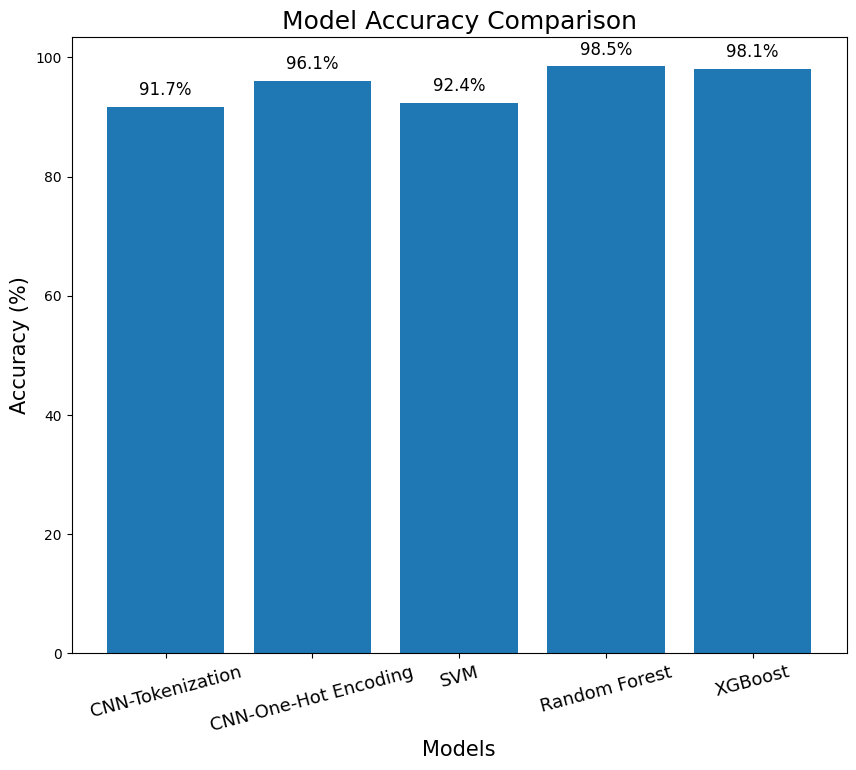

In [22]:
# Model names and corresponding accuracy scores
models = ['CNN-Tokenization', 'CNN-One-Hot Encoding', 'SVM', 'Random Forest', 'XGBoost']
accuracies = [91.7, 96.1, 92.4, 98.5, 98.1]

# Create a bar graph
plt.figure(figsize=(10, 8))
bars = plt.bar(models, accuracies)

# Add labels and a title
plt.xticks(models, fontsize=13, rotation=15)
plt.xlabel('Models', fontsize=15)
plt.ylabel('Accuracy (%)', fontsize=15)
plt.title('Model Accuracy Comparison', fontsize=18)

# Display accuracies above each bar
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 2, f'{accuracy}%', ha='center', fontsize=12)

# Save the graph
plt.savefig('models_plot.jpg')

# Show the graph
plt.show()
